```
BEGIN ASSIGNMENT
export_cell:
  instructions: "When done exporting, download the .zip file by `SHIFT`-clicking on the file name and selecting **Save Link As**. Or, find the .zip file in the left side of the screen and right-click and select **Download**. You'll submit this .zip file for the assignment in Canvas to Gradescope for grading."
  pdf: false
generate:
  points_possible: 9
files: 
  - Berkeley_PD_-_Calls_for_Service.csv
```

# Lab 03: Data Cleaning and Visualization

In this lab you will be working on cleaning and visualizing a dataset from the City of Berkeley containing data on calls to the Berkeley Police Department. Information about the dataset can be found [at this link](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5).

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Wednesday, February 17, 2021 at 7:00 p.m.

**Collaboration Policy:** Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below** (it's a good way to learn your classmates' names).

**Collaborators:** 

List collaborators here.

**Note:** In this notebook a custom figure size has been configured. Click [here](https://matplotlib.org/users/customizing.html) to read the documentation about customizing aspects of matplotlib.

Run the cell below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)

import otter
grader = otter.Notebook()

## 1. Cleaning and Exploring the Data

Load the `Berkeley_PD_-_Calls_for_Service.csv` dataset.

In [3]:
calls = pd.read_csv("Berkeley_PD_-_Calls_for_Service.csv")
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA


We see that the fields include a case number, the offense type, the date and time of the offense, the "CVLEGEND" which appears to be related to the offense type, a "CVDOW" which has no apparent meaning, a date added to the database, and the location spread across four fields.

Let's also check some basic information about these files using the `DataFrame.info` and `DataFrame.describe` methods.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASENO          3788 non-null   int64 
 1   OFFENSE         3788 non-null   object
 2   EVENTDT         3788 non-null   object
 3   EVENTTM         3788 non-null   object
 4   CVLEGEND        3788 non-null   object
 5   CVDOW           3788 non-null   int64 
 6   InDbDate        3788 non-null   object
 7   Block_Location  3788 non-null   object
 8   BLKADDR         3766 non-null   object
 9   City            3788 non-null   object
 10  State           3788 non-null   object
dtypes: int64(2), object(9)
memory usage: 325.7+ KB


In [4]:
calls.describe()

,CASENO,CVDOW
count,3.788000e+03,3788.000000
mean,1.804387e+07,2.997888
std,2.665970e+04,1.952160
min,1.801375e+07,0.000000
25%,1.802444e+07,1.000000
50%,1.803530e+07,3.000000
75%,1.804537e+07,5.000000
max,1.809135e+07,6.000000


**Question 1.1.** Why did the `DataFrame.describe` method chose the `CASENO` and the `CVDOW` columns? Do you think the output is useful? Explain.

```
BEGIN QUESTION
name: q1_1
manual: true
```

**Solution:** The columns contain numerical data. The output is not usefule because `CASENO` is a categorical value used to identify the case, therefore measures of central tendancy can't be interpreted. 

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

Before we go over the fields to see their meanings, let's verify that all the events happened in Berkeley by grouping on the `City` and `State` columns and using the `.count()` method to see how many cases are in the dataset.

In [5]:
calls.groupby(["City", "State"]).count()

,,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR
City,State,,,,,,,,,
Berkeley,CA,3788,3788,3788,3788,3788,3788,3788,3788,3766


Above, when we called `head`, it seemed like `OFFENSE` and `CVLEGEND` both contained information about the type of event reported. What is the difference in meaning between the two columns? One way to probe this is to look at the `value_counts` for each Series.

In [6]:
calls['OFFENSE'].value_counts().head(10)

BURGLARY AUTO               658
THEFT MISD. (UNDER $950)    633
DISTURBANCE                 277
VANDALISM                   248
VEHICLE STOLEN              235
THEFT FELONY (OVER $950)    214
BURGLARY RESIDENTIAL        194
ASSAULT/BATTERY MISD.       190
ROBBERY                     168
NARCOTICS                   118
Name: OFFENSE, dtype: int64

In [7]:
calls['CVLEGEND'].value_counts().head(10)

LARCENY                   871
BURGLARY - VEHICLE        658
DISORDERLY CONDUCT        279
ASSAULT                   263
VANDALISM                 248
MOTOR VEHICLE THEFT       235
FRAUD                     208
BURGLARY - RESIDENTIAL    194
ROBBERY                   168
DRUG VIOLATION            118
Name: CVLEGEND, dtype: int64

**Question 1.2.** Choose a items from each series that have been recorded using different descriptions, but share the same meaning.

```
BEGIN QUESTION
name: q1_2
manual: true
```

**Solution:** Answers may vary

**Question 1.3.** Choose an item from each series that has been recorded using the same description.

```
BEGIN QUESTION
name: q1_3
manual: true
```

**Solution:** Answers may vary

Above, it seems like `OFFENSE` is more specific than `CVLEGEND`, e.g. "LARCENY" vs. "THEFT FELONY (OVER $950)". If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.

**Question 1.4.** To get a sense of how many subcategories there are for each `OFFENSE`, set `calls_by_cvlegend_and_offense` equal to a multi-indexed series where the data is first indexed on the `CVLEGEND` and then on the `OFFENSE`, and the data is equal to the number of offenses in the database that match the respective `CVLEGEND` and `OFFENSE`. For example, `calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]` should return 24.

**Hint:** You can use the `.size` method on a GroupBy object to return the number of rows in each group as a Series or a DataFrame. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.size.html) to read the documentation on the `.size` method.

```
BEGIN QUESTION
name: q1_4
manual: true
```

In [8]:
calls_by_cvlegend_and_offense = calls.groupby([calls['CVLEGEND'], calls['OFFENSE']]).size() # SOLUTION
calls_by_cvlegend_and_offense

CVLEGEND                OFFENSE                 
ALL OTHER OFFENSES      MUNICIPAL CODE                3
ARSON                   ARSON                        18
ASSAULT                 ASSAULT/BATTERY FEL.         73
                        ASSAULT/BATTERY MISD.       190
BURGLARY - COMMERCIAL   BURGLARY COMMERCIAL         112
BURGLARY - RESIDENTIAL  BURGLARY RESIDENTIAL        194
BURGLARY - VEHICLE      BURGLARY AUTO               658
DISORDERLY CONDUCT      DISTURBANCE                 277
                        VICE                          2
DRUG VIOLATION          NARCOTICS                   118
FAMILY OFFENSE          DOMESTIC VIOLENCE           108
FRAUD                   FRAUD/FORGERY                95
                        IDENTITY THEFT              113
HOMICIDE                HOMICIDE                      1
KIDNAPPING              KIDNAPPING                    6
LARCENY                 THEFT FELONY (OVER $950)    214
                        THEFT FROM PERSON            24

In [87]:
# TEST
calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"] == 24

True

**Question 1.5.** In the cell below, set `offense_larceny` equal to a **list** of strings corresponding to the possible values for `OFFENSE` when `CVLEGEND` is "LARCENY". You can type the answer manually, or you can create an expression that automatically extracts the names.

**Hint:** The `.unique` method for series and `.tolist` method for arrays may be useful. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) to read the documentation on the `.unique` method and click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html) to read the documentation on the `.tolist` method.

```
BEGIN QUESTION
name: q1_5
manual: false
```

In [10]:
offense_larceny = calls[calls['CVLEGEND'] == "LARCENY"]['OFFENSE'].unique().tolist() # SOLUTION
offense_larceny

['THEFT MISD. (UNDER $950)', 'THEFT FELONY (OVER $950)', 'THEFT FROM PERSON']

In [90]:
# TEST
type(offense_larceny) == list

True

In [91]:
# TEST
len(offense_larceny) == 3

True

**Question 1.6.** What are the five crime types of `CVLEGEND` that have the **most** crime events? You may need to use `value_counts` to find the answer. Save your results into `cvlengend_types` as a **list** of strings.

**Hint:** The `.keys` method of the Series class might be useful. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.keys.html) to read the documentation on the `.keys` method.

```
BEGIN QUESTION
name: q1_6
manual: false
```

In [13]:
cvlengend_types = calls['CVLEGEND'].value_counts().iloc[0:5].keys().tolist() # SOLUTION
cvlengend_types

['LARCENY', 'BURGLARY - VEHICLE', 'DISORDERLY CONDUCT', 'ASSAULT', 'VANDALISM']

In [92]:
# TEST
type(cvlengend_types) == list

True

In [93]:
# TEST
len(cvlengend_types) == 5

True

## 2. Visualization

### Pandas and Seaborn Examples

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. 

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful.

As an example of the built-in plotting functionality of pandas, the following example uses `plot` method of the `Series` class to generate a `barh` plot type to visually display the value counts for `CVLEGEND`.

There are also many other plots that we will explore throughout the lab.

**Note:** You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions.

**Example 2.1.** Run the cell below.

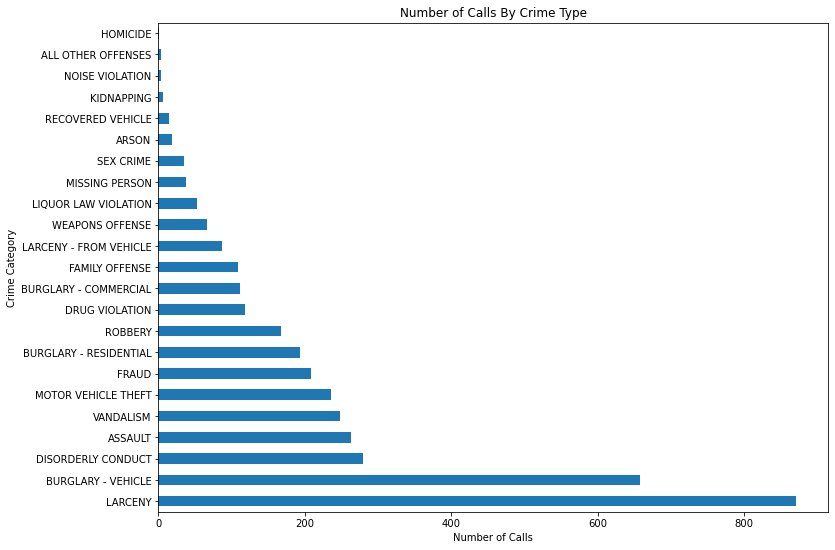

In [16]:
ax = calls['CVLEGEND'].value_counts().plot(kind = 'barh')
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

By contrast, the `Seaborn` library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. 

**Example 2.2.** Run the cell below.

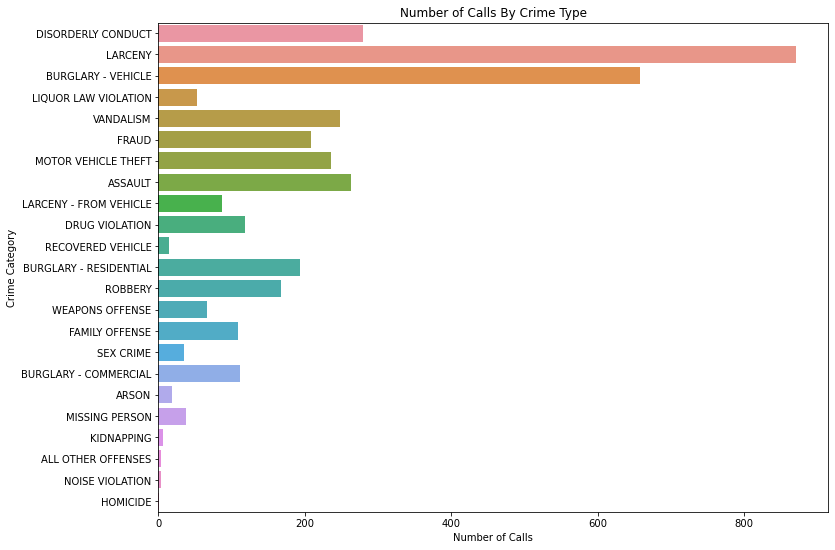

In [20]:
ax = sns.countplot(data=calls, y="CVLEGEND")
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

If we want the same ordering that we had in the `pandas` plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, we get the order we want.

**Example 2.3.** Run the cell below.

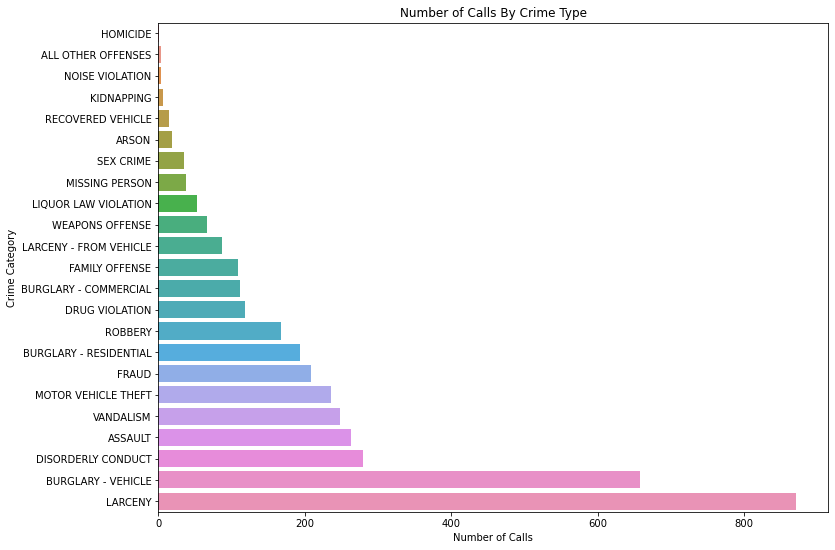

In [21]:
ax = sns.countplot(data=calls, y="CVLEGEND", order=calls["CVLEGEND"].value_counts(ascending=True).index);
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

It's is your turn to make some plots using `pandas`  Let's start by transforming the data so that it is easier to work with We then will look at some distributions of the data. 

The `CVDOW` field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website linked at the top of this notebook, `CVDOW` is actually indicating the day that events happened (e.g. 0 -> Sunday, 1 -> Monday, ..., 6 -> Saturday). 

**Question 2.1.** Add a new column `Day` into the `calls` dataframe that has the string weekday (eg. "Sunday") for the corresponding value in `CVDOW`. For example, if the first 3 values of `CVDOW` are `[3, 6, 0]`, then the first 3 values of the `Day` column should be `["Wednesday", "Saturday", "Sunday"]`.

**Hint:** Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["CVDOW"]`.  Can you assign this to the new column `calls["Day"]`?

```
BEGIN QUESTION
name: q2_1
manual: false
```

In [17]:
# BEGIN SOLUTION NO PROMPT
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_indices = range(7)
indices_to_days_dict = dict(zip(day_indices, days))
calls['Day'] = calls['CVDOW'].map(indices_to_days_dict)
# END SOLUTION
""" # BEGIN PROMPT
...
"""; # END PROMPT
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day
0,18022300,DISTURBANCE,04/18/2018 12:00:00 AM,22:17,DISORDERLY CONDUCT,3,09/06/2018 03:30:12 AM,"OREGON STREET &amp; MCGEE AVE\nBerkeley, CA\n(...",OREGON STREET & MCGEE AVE,Berkeley,CA,Wednesday
1,18026683,THEFT MISD. (UNDER $950),05/09/2018 12:00:00 AM,21:25,LARCENY,3,09/06/2018 03:30:13 AM,"200 UNIVERSITY AVE\nBerkeley, CA\n(37.865511, ...",200 UNIVERSITY AVE,Berkeley,CA,Wednesday
2,18038550,THEFT MISD. (UNDER $950),05/18/2018 12:00:00 AM,20:00,LARCENY,5,09/06/2018 03:30:09 AM,"2200 MILVIA ST\nBerkeley, CA\n(37.868574, -122...",2200 MILVIA ST,Berkeley,CA,Friday
3,18014810,BURGLARY AUTO,03/13/2018 12:00:00 AM,08:50,BURGLARY - VEHICLE,2,09/06/2018 03:30:08 AM,"1200 SIXTH ST\nBerkeley, CA\n(37.881142, -122....",1200 SIXTH ST,Berkeley,CA,Tuesday
4,18018643,ALCOHOL OFFENSE,03/31/2018 12:00:00 AM,13:29,LIQUOR LAW VIOLATION,6,09/06/2018 03:30:11 AM,"CENTER STREET &amp; SHATTUCK AVE\nBerkeley, CA...",CENTER STREET & SHATTUCK AVE,Berkeley,CA,Saturday


In [101]:
# TEST
'Day' in list(calls.columns)

True

In [102]:
# TEST
['Wednesday', 'Friday', 'Tuesday', 'Saturday', 'Monday', 'Sunday', 'Thursday'] == list(calls['Day'].unique())

True

**Question 2.2.** Run the cell below to create a `seaborn` plot. This plot shows the number of calls for each day of the week. Notice the use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 45 degrees.

```
BEGIN QUESTION
name: q2_2
manual: true
```

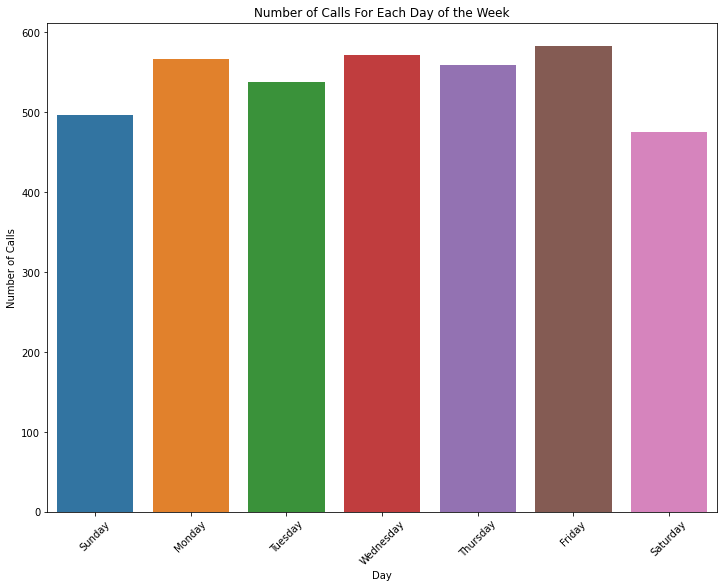

In [19]:
ax = sns.countplot(data = calls, x = 'Day', order = days)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls For Each Day of the Week");

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (e.g. Sunday, Monday, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** Given a series `call_counts`, and an array `day_index` that has the same entries as in `call_counts.index`, `call_counts[day_index]` will return a copy of the series in the same order as `day_index`.

```
BEGIN QUESTION
name: q2_3
manual: true
```

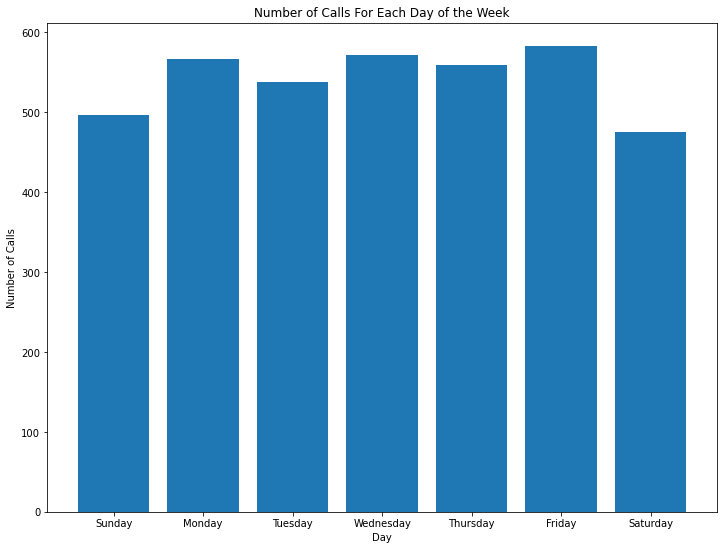

In [52]:
# BEGIN SOLUTION NO PROMPT
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
call_counts = calls['Day'].value_counts().reindex(days)
call_counts.sort_values()
day_index = call_counts.index
# END SOLUTION
""" # BEGIN PROMPT
...
"""; # END PROMPT
plt.bar(day_index, call_counts[day_index])
plt.ylabel("Number of Calls")
plt.xlabel("Day")
plt.title("Number of Calls For Each Day of the Week");

It seems weekdays generally have slightly more calls than Saturday or Sunday, but the difference does not look significant.  

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the `CVLEGEND` "NOISE VIOLATION" (i.e. Which day is the peak for "NOISE VIOLATION"?).

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. 

**Note:** Do not use `pandas` to plot.

**Hint:** If you're stuck, use the code for the seaborn plot in **Question 2.2.** as a starting point.

```
BEGIN QUESTION
name: q2_4
manual: true
```

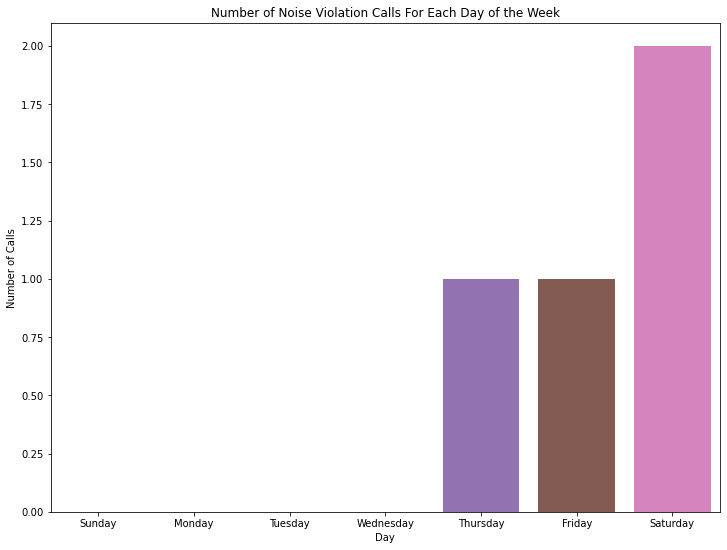

In [72]:
# BEGIN SOLUTION NO PROMPT
noise = calls[calls['CVLEGEND'] == 'NOISE VIOLATION']
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = sns.countplot(data = noise, x = 'Day', order = days)
# END SOLUTION
""" # BEGIN PROMPT
ax = ...
"""; # END PROMPT
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Noise Violation Calls For Each Day of the Week");

**Question 2.5.** Describe the distribution of noise voilations during the week.

```
BEGIN QUESTION
name: q2_5
manual: true
```

**Solution:** Answer may vary.

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in **Question 2.5.**, but now looking at instances of the `CVLEGEND` "FRAUD" (instead of "NOISE VIOLATION"). Use either `pandas` or `seaborn` plotting as you desire.

```
BEGIN QUESTION
name: q2_6
manual: true
```

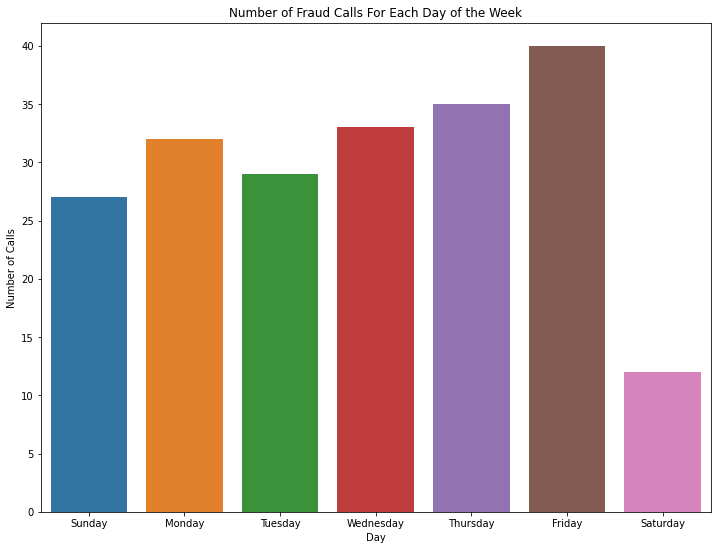

In [73]:
# BEGIN SOLUTION NO PROMPT
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
fraud = calls[calls['CVLEGEND'] == 'FRAUD']
ax = sns.countplot(data = fraud, x = 'Day', order = days);
# END SOLUTION
""" # BEGIN PROMPT
ax = ...
"""; # END PROMPT
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Fraud Calls For Each Day of the Week");

Now let's look at the `EVENTTM` column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** The `str` helper member of a series can be used to grab substrings.

```
BEGIN QUESTION
name: q2_7
manual: false
```

In [74]:
# BEGIN SOLUTION NO PROMPT
calls['Hour'] = calls["EVENTTM"].str.slice(0,2).astype(int)
# END SOLUTION
""" # BEGIN PROMPT
...
"""; # END PROMPT

In [75]:
# TEST
'Hour' in list(calls.columns)

True

In [76]:
# TEST
calls['Hour'].sum() == 50601

True

In [77]:
# TEST
calls['Hour'].dtypes == 'int64'

True

The code in the cell below creates a pandas bar plot showing the number of `FRAUD` crimes committed at each hour of the day.

**Example 2.4.** Run the cell below.

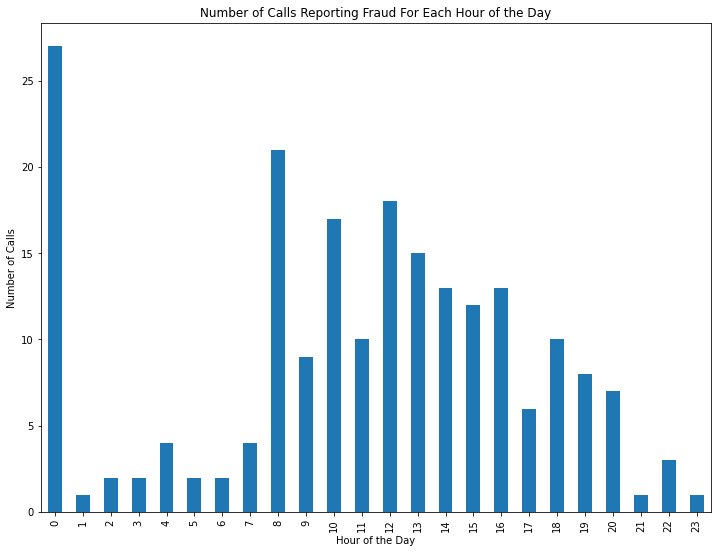

In [78]:
ax = calls[calls["CVLEGEND"] == "FRAUD"]['Hour'].value_counts().sort_index().plot(kind = 'bar')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Hour of the Day");

The cell below contains a seaborn plot of the same data.

**Example 2.5.** Run the cell below.

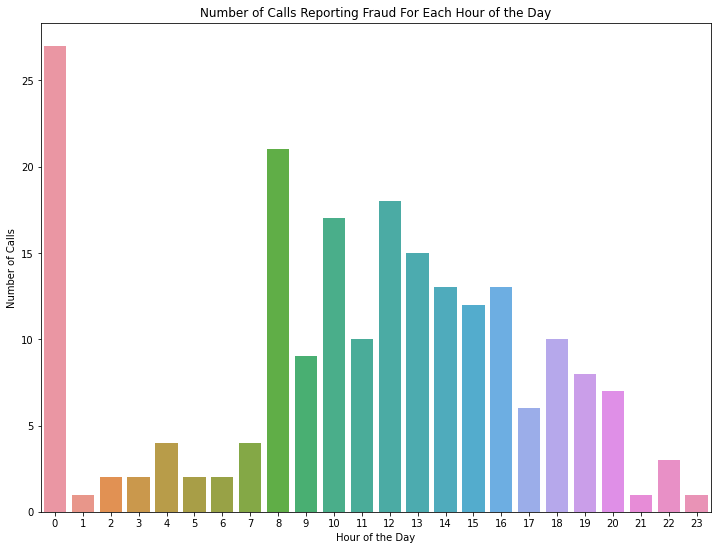

In [79]:
ax = sns.countplot(data = calls[calls["CVLEGEND"] == "FRAUD"], x = 'Hour')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Hour of the Day");

According to our plots, there seems to be a spike in calls reporting fraud at midnight (i.e. 0 -> 12:00 a.m.). 

**Questio 2.8.** Do you trust that this spike is legitimate, or could there be an issue with our data? Give a brief explanation (i.e. 1-2 sentences) for your reasoning.

```
BEGIN QUESTION
name: q2_8
manual: true
```

**Solution:** Answers may vary.

Let's make a bar plot for the `CVLEGEND` "ROBBERY".

**Question 2.9.** Use `pandas` or `seaborn` to create a vertical bar plot of the number of total robberies reported on each day of the week, again ordered by the days of the week starting with Sunday. 

```
BEGIN QUESTION
name: q2_9
manual: true
```

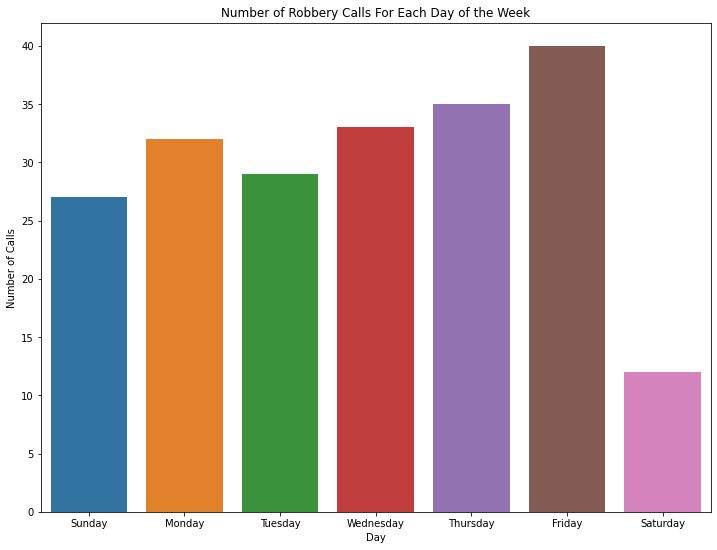

In [85]:
# BEGIN SOLUTION NO PROMPT
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
robbery = calls[calls['CVLEGEND'] == 'ROBBERY']
ax = sns.countplot(data = fraud, x = 'Day', order = days);
# END SOLUTION
""" # BEGIN PROMPT
ax = ...
"""; # END PROMPT
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Robbery Calls For Each Day of the Week");

,CASENO,CVDOW,Hour
count,3.788000e+03,3788.000000,3788.000000
mean,1.804387e+07,2.997888,13.358237
std,2.665970e+04,1.952160,6.630639
min,1.801375e+07,0.000000,0.000000
25%,1.802444e+07,1.000000,9.000000
50%,1.803530e+07,3.000000,14.000000
75%,1.804537e+07,5.000000,19.000000
max,1.809135e+07,6.000000,23.000000
